<a href="https://colab.research.google.com/github/michela2323/end-to-end-data-engineering-project-4413618/blob/main/PrimeraEntrega_Guardia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1-ABSTRACT

Objetivo

El presente informe nace de como motivo de la crisis financiera 2008, 1930, con el objetivo de poder identificar algunas variables presentes en las mismas y lograr con las mismas alguna posibilidad de preveer las crisis.

Contexto Comercial

La crisis financiera 2008 ha tenido un gran impacto a nivel mundial y ha afectado en mayor o menor medida en cada uno de los paises. Este análisis es de interés para los bancos "serios" (comerciales y de inversión), para evitar una eventual quiebra. Los terceros interesados como ser los inversores, titulares primarios de los capitales, sean fondos de pensión, empresas cuyos sobrantes los colocan en fondos comunes de inversión através de bancos, también son clientes, pero a menudo no disponen de la misma información o bien la inside information. Entonces de esta manera no solo con los bancos los clientes sino también las personas humanas o no que han ahorrado y buscan salvaguardar mendiante algún instrumento financiero.

El Problema Comercial

Por como veo, en una crisis financiera se suele omitir o no contemplar ciertos indicios. Esto es, análisis de deudas de bancos, tasas de interés, crisis de deudas de países por déficits fiscales. Por lo general existen las agencias calificadoras de riesgos que se encargan de realizar estas tareas, ahora, si bien deben velar por los intereses de los clientes, lo hacen en realidad por los fondos o bancos y no de sus clientes reales o "verdaderos", es decir veo una falta o vacio de una especie de "agencia calificadora de riesgos" para los depositantes/ahorristas/jubilado si se quiere. Con esto en lo que pienso es que el inversor/depositante/ahorrista/jubilado no tiene un asesor que no sea el del banco o financista, apunto así a un consultor/datos reportándolo directamente  sobre sus tenencias. Claro está que quizá estemos entrando en temas regulatorios. En argentina exite una organismo que regula el asesoramiento, este organismo es la CNV, comisión nacional de valores. En USA se los conoce como la SEC, security exchange comision. En una primera instanacia lo que planteo es una base de datos, plataforma que reporte avisos de posibles quiebras, crisis, datos de interés y posibles acciones a tomar en función de la situación y/o posición de cada persona. Esto me hace pensar en las plataformas de bloomberg, lo cual no me convence para una persona común, pues es algo sofisticado y busco plantear algo más sencillo, creo que las plataformas de investin.com/yahoofinance pueden cumplir en algo.   

Se intentará traducir al castellano lo mejor posible las variables a analizar para un mejor entendimieto de los análisis de los datos disponibles.



In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


El siguiente dataset muestra las crisis bancarias a través de diferentes variables, como ser:


0   Bankrupt (si/no)

1    ROA(C) before interest and depreciation before interest/ Rentabilidad Sobre Activos antes de amortizaciones e intereses

2    ROA(A) before interest and % after tax / Rentabilidad sobre activos antes de intereses y luego de impuestos          

3    ROA(B) before interest and depreciation after tax / Rentabilidad sobre activos antes de intereses y amortizaciones, luego de impuestos

4    Operating Gross Margin  / Margen bruto operativo

5    Realized Sales Gross Margin / Margen Bruto de las ventas realizadas

6    Operating Profit Rate / Tasa operativa de beneficio

7    Pre-tax net Interest Rate / Tasa de interés neto antes del impuesto

8    After-tax net Interest Rate / Tasa de interés neto luego del impuesto

9    Non-industry income and expenditure/revenue       

10   Continuous interest rate (after tax)

11   Operating Expense Rate

12   Research and development expense rate

13   Cash flow rate

14   Interest-bearing debt interest rate

15   Tax rate (A) / Tasa de impuesto

16   Net Value Per Share (B) Valor neto por acción

17   Net Value Per Share (A)

18   Net Value Per Share (C)

19   Persistent EPS in the Last Four Seasons / Ganancias por acción en las últimas 4 temporadas

20   Cash Flow Per Share / Flujo de caja /(efectivo) por acción

In [ ]:
#DATASET 1
import pandas as pd
df=pd.read_csv('/content/gdrive/MyDrive/CODER DATA SCIENCE/bankrupcy.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

2-HIPOTESIS

Quiero probrar si existe relación o no entre algunas variables coomo principal análisis de los datos. Algunas de las variables que pretendo estudiar son:

2.1-Hay relación entre Retorno sobre activo total y dependencia de préstamos?.
Es decir tiene alguna relación la rentabilidad y la deuda?

2.2-Interest Expense Ratio & Debt ratio %.
Hay relación entre el ratio de gasto en intereses y el ratio de deuda?

2.3-Hay relación entre el ratio de deuda y la banca-rota?

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats


In [ ]:
df.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


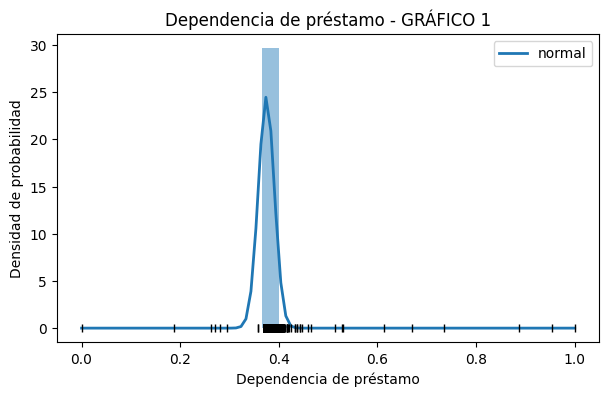

In [ ]:
mu, sigma = stats.norm.fit(df[" Borrowing dependency"])

# Valores teóricos de la normal en el rango observado
x_hat = np.linspace(min(df[" Borrowing dependency"]), max(df[" Borrowing dependency"]), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)

# Gráfico
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(x_hat, y_hat, linewidth=2, label='normal')
ax.hist(x=df[" Borrowing dependency"], density=True, bins=30, color="#3182bd", alpha=0.5)
ax.plot(df[" Borrowing dependency"], np.full_like(df[" Borrowing dependency"], -0.01), '|k', markeredgewidth=1)
ax.set_title('Dependencia de préstamo - GRÁFICO 1')
ax.set_xlabel('Dependencia de préstamo')
ax.set_ylabel('Densidad de probabilidad')
ax.legend();

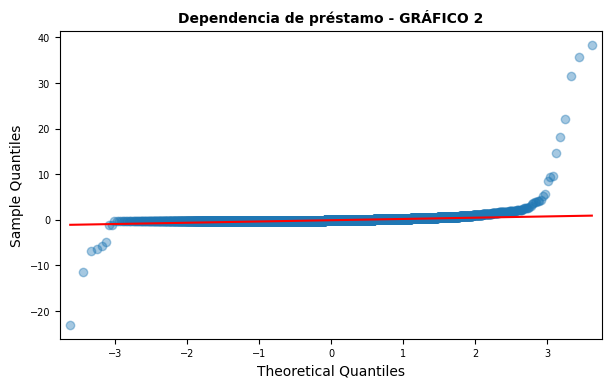

In [ ]:
from matplotlib import style
import statsmodels.api as sm
from scipy import stats
fig, ax = plt.subplots(figsize=(7,4))
sm.qqplot(
    df[" Borrowing dependency"],
    fit   = True,
    line  = 'q',
    alpha = 0.4,
    lw    = 2,
    ax    = ax
)
ax.set_title('Dependencia de préstamo - GRÁFICO 2', fontsize = 10,
             fontweight = "bold")
ax.tick_params(labelsize = 7)

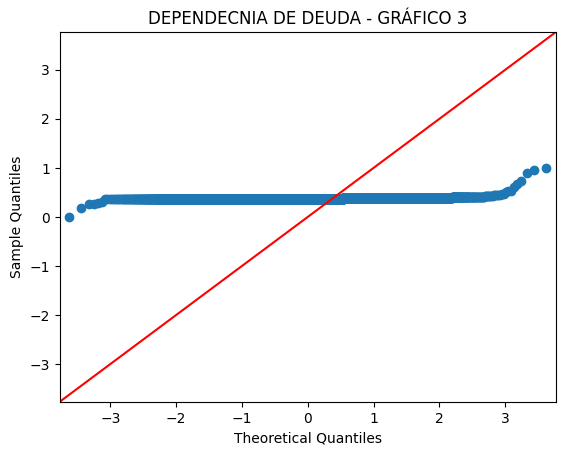

In [ ]:
fig = sm.qqplot(df[" Borrowing dependency"], line="45")
plt.title("DEPENDECNIA DE DEUDA - GRÁFICO 3" )

plt.show()

In [ ]:
shapiro_test = stats.shapiro(df[" Borrowing dependency"])
shapiro_test

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.18964773416519165, pvalue=0.0)

In [ ]:
k2, p_value = stats.normaltest(df[" Borrowing dependency"])
print(f"Estadístico = {k2}, p-value = {p_value}")

Estadístico = 15347.97450214678, p-value = 0.0


EDA

Como se puede apreciar en el primer gráfico al principio los datos de la columna dependencia de préstamo parece tener una distribución normal. Luego para probar con un 2do método visual hice un gráfico de puntos con su respectiva recta, en 3er lugar lo compré con una recta de 45 grados y efectivamente no se ajusta a la recta. Por último quedaba contrastar con un test, tanto el test de shapiro como el normaltest el valor p es nulo, con lo cual si la hipótesis nula plantea que se distribuye normalmente, entonces rechazo la hipótesis nula para un alfa de 0,05, es decir los datos de la variable dependencia de préstamo no siguen una distribución normal, tal cual veíamos en el gráfico de puntos no ajustandosé a la récta de 45grados.

In [ ]:
import math
import numpy as np
from scipy.stats import shapiro
from scipy.stats import lognorm

In [ ]:
shapiro(df[" Borrowing dependency"])

ShapiroResult(statistic=0.18964773416519165, pvalue=0.0)

Media original: 0.37465429459872324
Desvio estandar original: 0.016286163355500444


Text(0.5, 1.0, 'DEPENDECNIA DE DEUDA - GRÁFICO 4')

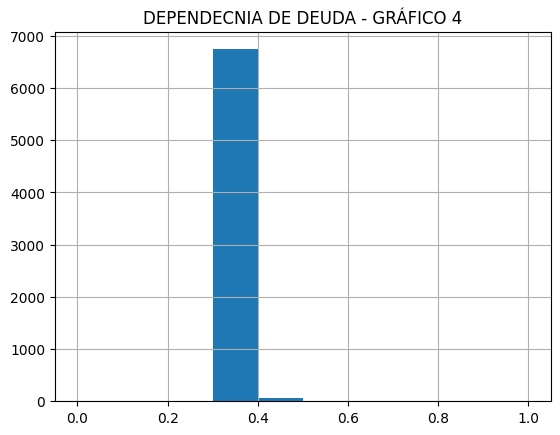

In [ ]:
df[' Borrowing dependency'].hist()
media = df[' Borrowing dependency'].mean()
sd    = df[' Borrowing dependency'].std()
print("Media original: " + str(media))
print("Desvio estandar original: " + str(sd))
plt.title("DEPENDECNIA DE DEUDA - GRÁFICO 4" )

In [ ]:
df[" Interest Expense Ratio"].describe()


count    6819.000000
mean        0.630991
std         0.011238
min         0.000000
25%         0.630612
50%         0.630698
75%         0.631125
max         1.000000
Name:  Interest Expense Ratio, dtype: float64

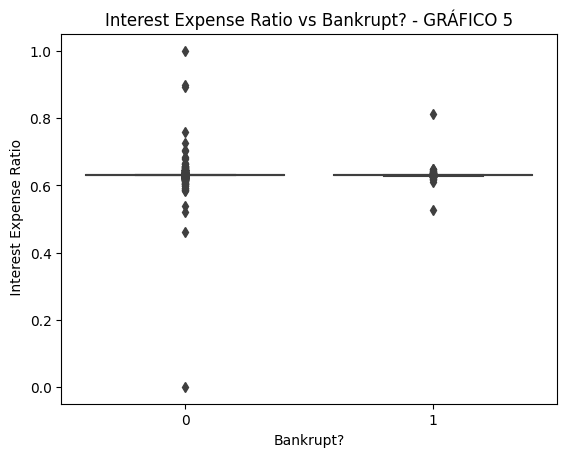

In [ ]:
sns.boxplot(x='Bankrupt?', y = " Interest Expense Ratio", data = df)
#Data.boxplot(grid= False, column = ['pay'], by = ['gender'])
plt.title("Interest Expense Ratio vs Bankrupt? - GRÁFICO 5" );
#GRÁFICO 5

In [ ]:
df[" Debt ratio %"].describe()

count    6819.000000
mean        0.113177
std         0.053920
min         0.000000
25%         0.072891
50%         0.111407
75%         0.148804
max         1.000000
Name:  Debt ratio %, dtype: float64

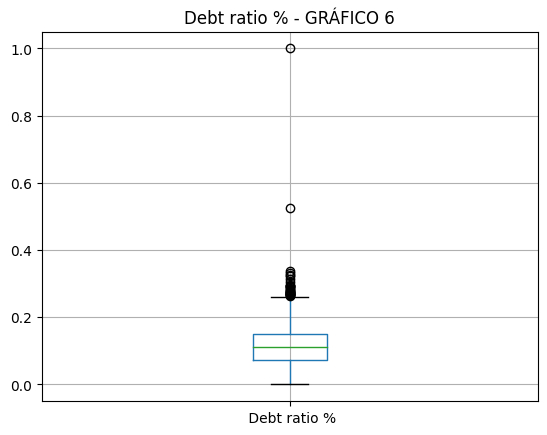

In [ ]:
df.boxplot(column =" Debt ratio %")
plt.title("Debt ratio % - GRÁFICO 6" );

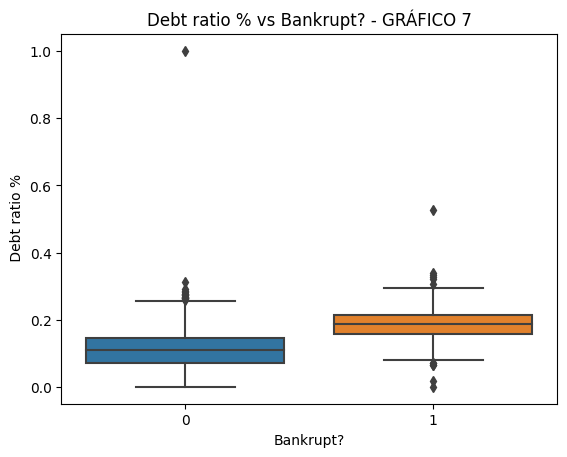

In [ ]:
sns.boxplot(x='Bankrupt?', y = ' Debt ratio %', data = df)
#Data.boxplot(grid= False, column = ['pay'], by = ['gender'])
plt.title("Debt ratio % vs Bankrupt? - GRÁFICO 7" );
#GRÁFICO 4

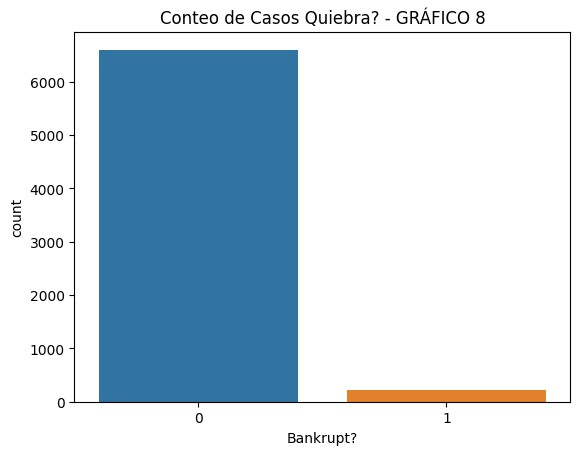

In [ ]:
sns.countplot(df, x="Bankrupt?")
plt.title("Conteo de Casos Quiebra? - GRÁFICO 8" );

In [ ]:
df["Bankrupt?"].value_counts()

0    6599
1     220
Name: Bankrupt?, dtype: int64

EDA

El primer gráfico de la variable Borrowing dependency, parece ser una distribución normal, lo cual podríamos verificar con un test o bien una aproximación a la recta de regresión.

De estos 2 resúmenes estadísticos podemos establecer que los ratios de gastos en intereses son altos con un promedio de 0,63 no habiendo gran diferencia entre ambos grupos, quienes quebraron y quienes no. Donde si hay diferencia entre ambos grupos es en el ratio de deuda, no en la tasa de gasto de interés. Es decir son los podemos hacer un primer acercamiento a una posible conclusión y son las abultadas deudas de quienes han quebrado.

GRÁFICO 7: De acá se puede interpretar que los bancos que han presentado banca-rota se han endeudado por encima (50%=75%-25%) de aquellos que no han presentado banca-rota. La mediana de los que han presentado banca-rota es mayor a la mediana de los que no han presentado banca-rota.

Según el gráfico 8 podemos ver que el número de casos de quiebra es de 220, respecto a los 6599 que no han quebrado. Es de notar la increible deuda que habran tomado quienes quebraron, ya que además los 6599 se han mantenido concentrados y no endeudarse fuera de sus parámetros.



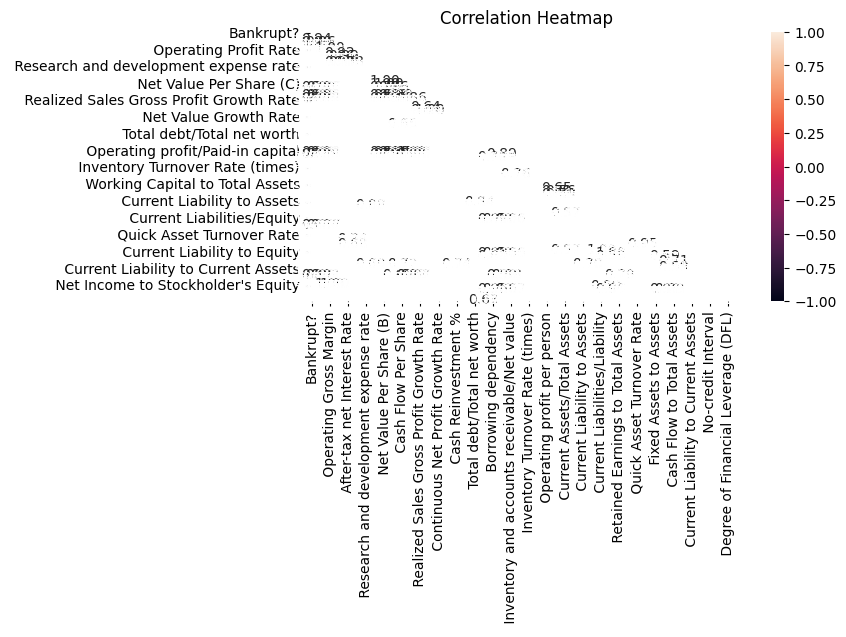

In [ ]:
plt.figure(dpi = 100,figsize= (7,3.5))
mask = np.triu(np.ones_like(df.corr(),dtype = bool))
sns.heatmap(df.corr(),mask = mask, fmt = ".2f",annot=True,lw=1)
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.title('Correlation Heatmap')
plt.show()

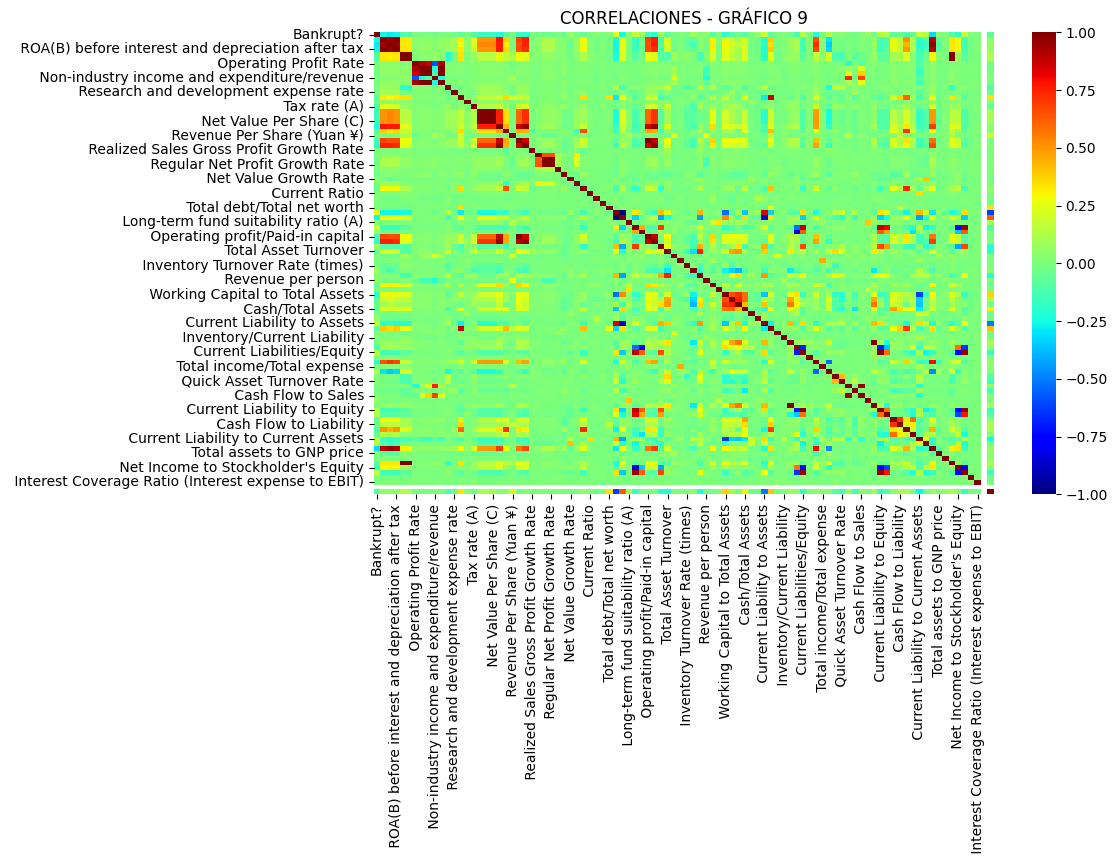

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(data=df.corr(), cmap='jet')
plt.title("CORRELACIONES - GRÁFICO 9" );

#GRÁFICO 6

In [ ]:
def parejas(df):
    '''Obtiene diagonal inferior de parejas en matriz de correlacion'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def correlaciones(data, n=5):
    au_corr = data.corr().abs().unstack()
    labels_to_drop = parejas(data)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Correlaciones mas grandes")
print(correlaciones(df, 10)) # Saquemos el top 10
#TOP CORRELACIONES

Correlaciones mas grandes
 Current Liabilities/Liability         Current Liability to Liability      1.000000
 Current Liabilities/Equity            Current Liability to Equity         1.000000
 Debt ratio %                          Net worth/Assets                    1.000000
 Operating Gross Margin                Gross Profit to Sales               1.000000
 Net Value Per Share (A)               Net Value Per Share (C)             0.999837
 Operating Gross Margin                Realized Sales Gross Margin         0.999518
 Realized Sales Gross Margin           Gross Profit to Sales               0.999518
 Net Value Per Share (B)               Net Value Per Share (A)             0.999342
                                       Net Value Per Share (C)             0.999179
 Operating Profit Per Share (Yuan ¥)   Operating profit/Paid-in capital    0.998696
dtype: float64


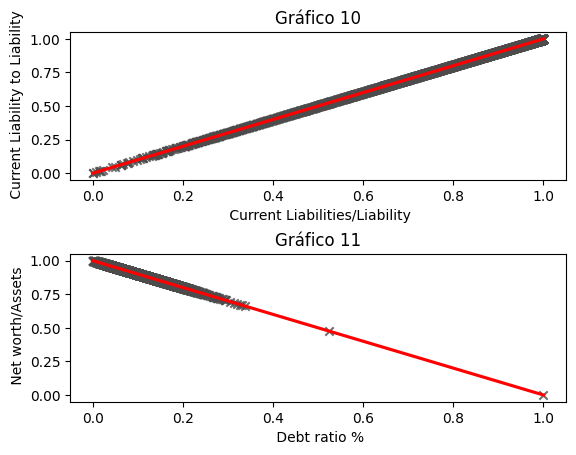

In [ ]:
fig = plt.figure()

ax1 = fig.add_subplot(2, 1, 1)
sns.regplot(
    data=df, x=" Current Liabilities/Liability", y=" Current Liability to Liability",
    ci=99, marker="x", color=".3", line_kws=dict(color="r"),
)
ax1.set_title('Gráfico 10')

ax2 = fig.add_subplot(2, 1, 2)
sns.regplot(
    data=df, x=" Debt ratio %", y=" Net worth/Assets",
    ci=99, marker="x", color=".3", line_kws=dict(color="r"),
)
ax2.set_title('Gráfico 11')

plt.subplots_adjust(hspace=0.5)

plt.show()

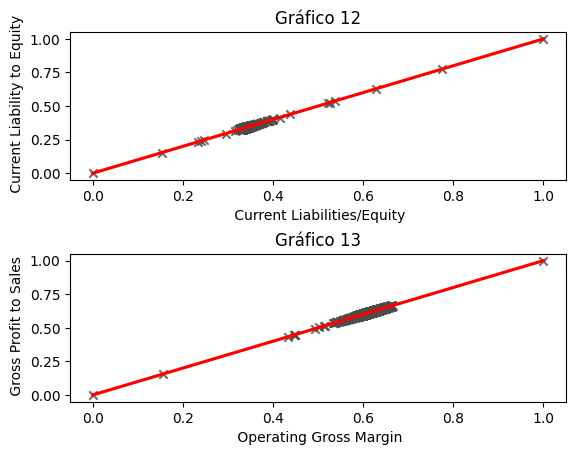

In [ ]:
fig = plt.figure()

ax1 = fig.add_subplot(2, 1, 1)
sns.regplot(
    data=df, x=" Current Liabilities/Equity", y=" Current Liability to Equity",
    ci=99, marker="x", color=".3", line_kws=dict(color="r"),
)
ax1.set_title('Gráfico 12')

ax2 = fig.add_subplot(2, 1, 2)
sns.regplot(
    data=df, x=" Operating Gross Margin", y=" Gross Profit to Sales",
    ci=99, marker="x", color=".3", line_kws=dict(color="r"),
)
ax2.set_title('Gráfico 13')

plt.subplots_adjust(hspace=0.5)

plt.show()

3-EDA

Las correlaciones más grandes se dan entre


Pasivo Corriente y Pasivo                                         1.000000

Pasivo corriente y Patrimonio neto                              1.000000

Ratio de deuda    Capital Propio/Activos                          1.000000

Margen bruto operativo  Beneficio bruto s/vtas                    1.000000


Esto tiene sentido porque el pasivo corriente es parte de pasivo (el pasivo es total que incluye al pasivo corriente)

El pasivo corriente y patrimonio neto, no me queda claro desde lo conceptual de la contabilidad, después veré si le encuentro interpretación

El ratio de deuda aumenta a medida que disminuye el patrimonio neto/activo, esto se debe a que la deuda es el complemento del patrominio neto, que juntos sumados hacen el activo total. Así se aprecia la relación inversa entre ambas. Ver gráfico de relación inversa.

Margen bruto op y benf bruto s/vtas, tienen relación positiva, en ambos casos se parte el cálculo sobre las ventas.



In [ ]:
# Ajustar un modelo de regresión lineal
model = sm.OLS(df[" Debt ratio %"], sm.add_constant(df[" Net worth/Assets"])).fit()

# Calcular los residuos
residuos = model.resid

print(residuos)

0       4.718448e-16
1       4.440892e-16
2       3.885781e-16
3      -5.273559e-16
4      -5.134781e-16
            ...     
6814    4.857226e-16
6815    2.220446e-16
6816    1.249001e-16
6817    2.220446e-16
6818    7.337880e-16
Length: 6819, dtype: float64


In [ ]:
from statsmodels.stats.stattools import durbin_watson

# realizar la prueba de Durbin-Watson
durbin_watson(residuos)

0.47037231516399197

EDA

Con el método Durbin-Watson, lo que pretendo es analizar la autocorrelación de los residuos. Tengo entendido que el estadístico se va de 0 a 4, y que mientras esté cerca de 0, hay una relación negativa entre los residuos, es decir no estarían auto correlacionados.

Por otro lado, hay unas zonas que se definen como indecisas mediante tablas de la durbin-watson, las mismas se definen con DL y DU. Esto es para consultar con el prefe.


PRIMERAS CONCLUSIONES

La variable dependencia de préstamo no sigue una distribución normal aunque así lo parezca visualmente.

Los casos de quiebra son 220 y quienes no han quebrado son 6599, habiendo diferencia significativa entre las mismas, al menos visualmente (grupos de datos separados/clusters). Esto podría contrastar con test de comparación de medias, lo cual lo dejaré para una próxima entrega. Podría también clusterizarlos, para ver la nube de puntos.

Como primer cierre podría decir que quienes han quebrado se han endeudado significativamente respecto de sus patromonios netos, lo que en la jerga de las finanzas se conoce como un sobreapalancamiento, lo que los llevo a quebrar pues no disponian de fondos/respaldos ni garantías para hacer frente a las obligaciones contraidas.


# **PRÁCTICA INTEGRADORA**
Elijo Forward Selection, aunque los otros 2 los hago solo para tener el trabajo algo más completo y prácticar.

In [ ]:

print(df.shape)         # dataset dimension


(6819, 96)


In [ ]:
pip install mlxtend

In [ ]:
#Definir las variables X e Y

y = df['Bankrupt?']
X = df.drop(['Bankrupt?'], axis=1)

2-ELIJO REGRESIÓN LINEAL SIMPLE


3-MÉTRICA: R2 - R cuadrado


In [ ]:
#Librerias
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
# Sequential Forward Selection(sfs)
sfs = SFS(LinearRegression(),
          k_features=5,
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 0)

In [ ]:
sfs.fit(X,y)
sfs.k_feature_names_     #Lista final de features

(' Debt ratio %',
 ' Operating Funds to Liability',
 ' Working Capital/Equity',
 ' Liability-Assets Flag',
 ' Net Income to Total Assets')

 Puedo ver como una las principales variables explicativas de la banca rota es el ratio de deuda, supuesto que venimos manejando desde el comienzo.

 Como otras variables explicativas de la banca rota o no son:

 La 2da variable en la lista es, Fondos operativos para cubrir pasivos: esto me hace pensar en que a medida que se acaban los fondos/disponibilodades se recurren a endeudamiento.

 La 3era variable, El capital de trabajo/Valor para accionistas, el capital de trabajo en rasgos nenerales es el dinero/crédito necesario para el normal funcionamiento de un negocio, es decir que podría decir que para continuar funcionando se tuvieron que endeudar.

 La 4ta variable, es un indicar pasivo-activo, se ve que si el dataset cuenta con esta variable es que ya han realizado algunas pruebas, sería una especie de ratio de activo/pasivo.

 La quinta variable utilidad neta para total de activos, parece llevar al endeudamiento, a lo cual le encuentro sentido, ya que si sus utilidades no son suficientes o se reducen, tienen a no cubrir sus pasivos y/o contribuir al normal funcionamiento de un negocio.   



## **Backward selection**

In [ ]:
def backward_elimination(df, target,significance_level = 0.000000001):
    features = df.columns.tolist()
    while(len(features)>0):
        features_with_constant = sm.add_constant(df[features])
        p_values = sm.OLS(target, features_with_constant).fit().pvalues[1:]
        max_p_value = p_values.max()
        if(max_p_value >= significance_level):
            excluded_feature = p_values.idxmax()
            features.remove(excluded_feature)
        else:
            break
    return features

In [ ]:
backward_elimination(X,y)

[' ROA(A) before interest and % after tax',
 ' Net worth/Assets',
 ' Borrowing dependency',
 ' Inventory and accounts receivable/Net value',
 ' Retained Earnings to Total Assets',
 ' Liability-Assets Flag',
 ' Net Income to Total Assets']

Si aplicaba un nivel de significancia del 5% me daba como resultado 35 variables de salida aprox, así que lo tuve que ir reduciendo con un nivel de significancia del 0.0000001% para obtener al menos 5 variables, de las cuales solo 2 coinciden con la salida anterior.


 VARIABLES QUE COINCIDEN CON EL MÉTODO FORWARD SELECTION

 ' Liability-Assets Flag',

 ' Net Income to Total Assets']

## **Eliminación bidireccional (stepwise)**

In [ ]:
def stepwise_selection(df, target,SL_in=0.000000001,SL_out = 0.000000001):
    initial_features = df.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(df[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<SL_in):
            best_features.append(new_pval.idxmin())
            while(len(best_features)>0):
                best_features_with_constant = sm.add_constant(df[best_features])
                p_values = sm.OLS(target, best_features_with_constant).fit().pvalues[1:]
                max_p_value = p_values.max()
                if(max_p_value >= SL_out):
                    excluded_feature = p_values.idxmax()
                    best_features.remove(excluded_feature)
                else:
                    break
        else:
            break
    return best_features

In [ ]:
stepwise_selection(X,y)

<ipython-input-36-8d158f7eb7b9>:6: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-36-8d158f7eb7b9>:6: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-36-8d158f7eb7b9>:6: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-36-8d158f7eb7b9>:6: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
<ipython-input-36-8d

[' Net Income to Total Assets',
 ' Net Income Flag',
 ' Debt ratio %',
 ' Working Capital/Equity',
 ' Net worth/Assets',
 ' Liability-Assets Flag',
 ' Operating Funds to Liability']

Con este método bidireccional, se repiten las variables de los métodos anteriores, con el agregado de una variable. Se aplica un nivel de significancia de 0.0000001%, a fin de reducir el número de variables de salida.

' Net Income to Total Assets',

 ' Net Income Flag', ESTA VARIABLE NO ESTABA EN NINGUNA DE LOS 2 MÉTODOS ANTERIORES

 ' Debt ratio %',

 ' Working Capital/Equity',

 ' Net worth/Assets',

 ' Liability-Assets Flag',

 ' Operating Funds to Liability']

#MODELO DE CLASIFICACIÓN 1 - REGRESIÓN LOGISTICA

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Suponiendo que df es tu DataFrame con columnas 'Debt ratio %', 'Net worth/Assets' y 'Bankrupt?'

# Variables independientes (X) y variable dependiente (y)
#X = df[[' ROA(C) before interest and depreciation before interest', ' ROA(A) before interest and % after tax', ' ROA(B) before interest and depreciation after tax',' Debt ratio %', ' Net worth/Assets']]
X = df.drop('Bankrupt?', axis=1)
y = df['Bankrupt?']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear un modelo de regresión logística
modelo = LogisticRegression()

# Entrenar el modelo con los datos de entrenamiento
modelo.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = modelo.predict(X_test)

# Crear una matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Imprimir la matriz de confusión
print("Matriz de confusión:\n", conf_matrix)

Matriz de confusión:
 [[1311    2]
 [  51    0]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


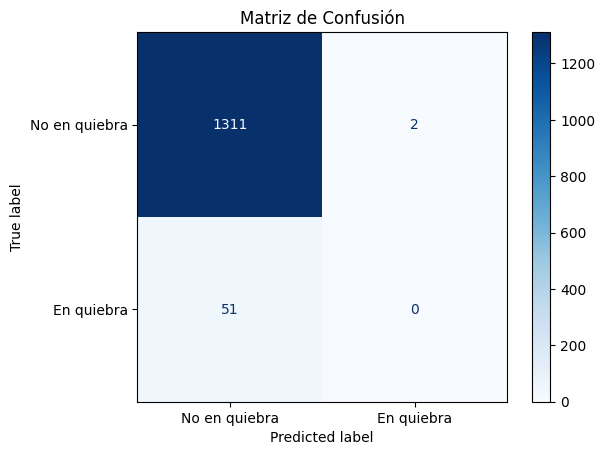

In [ ]:
# Visualizar la matriz de confusión con etiquetas
labels = ['No en quiebra', 'En quiebra']
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=labels)

# Configurar y mostrar la visualización
disp.plot(cmap='Blues', values_format='d')
plt.title('Matriz de Confusión')
plt.show()

In [ ]:
from sklearn import metrics
confusion = metrics.confusion_matrix(y_test, y_pred)
confusion.ravel()

array([1311,    2,   51,    0])

In [ ]:
#Métrica 1
accuracy = metrics.accuracy_score(y_test, y_pred)
accuracy

0.9611436950146628

El 96% de las veces el modelo predice correctamente.

In [ ]:
#Métrica 2
# Precision se evalua para cada categoria
precision_positiva = metrics.precision_score(y_test, y_pred, pos_label=1)
precision_negativa = metrics.precision_score(y_test, y_pred, pos_label=0)
precision_positiva, precision_negativa

(0.0, 0.9625550660792952)

In [ ]:
recall_sensibilidad = metrics.recall_score(y_test, y_pred, pos_label=1)
recall_especificidad= metrics.recall_score(y_test, y_pred, pos_label=0)
recall_sensibilidad, recall_especificidad

(0.0, 0.9984767707539984)

In [ ]:
f1_positivo = metrics.f1_score(y_test, y_pred, pos_label=1)
f1_negativo = metrics.f1_score(y_test, y_pred, pos_label=0)
f1_positivo, f1_negativo

(0.0, 0.9801869158878506)

In [ ]:
# Todas las metricas en uno
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1313
           1       0.00      0.00      0.00        51

    accuracy                           0.96      1364
   macro avg       0.48      0.50      0.49      1364
weighted avg       0.93      0.96      0.94      1364



##Para datos desbalanceados el accuracy no es una buena metrica de medición del modelo de clasificación. Aún así me predice mejor quienes no están en banca rota. La precisión y el recall también solo predicen para los bancos que no están quebrados. El F1 score debería funcionar para datos que están desbalanceados, como es mi caso ya que tengo 1313 que no estan en banca rota y 51 que sí están en banca rota. En mi caso el f1 score tampoco es una buena métrica para predecir los que están en banca rota, porque es cero "0".

##Conclusión: Utilizo el F1 Score, siendo teóricamente el más válido con métrica 0.98 para predicir la clase 0 (los que no están en banca rota), aunque con cautela e intentaré con modelos de CLASIFICACIÓN.  El modelo parece tener un buen rendimiento en la clasificación de la clase 0, pero un rendimiento muy deficiente en la clasificación de la clase 1, como se evidencia por las métricas mencionadas.


#MODELO DE CLASIFICACIÓN 2 - KNN

In [ ]:
# prompt: clasificación con KNN

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Import the dataset
#df = pd.read_csv('data.csv')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('Bankrupt?', axis=1), df['Bankrupt?'], test_size=0.20, random_state=42)

# Create a KNN model
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


In [ ]:
# Todas las metricas en uno
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1313
           1       0.33      0.02      0.04        51

    accuracy                           0.96      1364
   macro avg       0.65      0.51      0.51      1364
weighted avg       0.94      0.96      0.95      1364



#MODELO DE CLASIFICACIÓN 3: ARBOL DE DECISIÓN

In [ ]:
# prompt: clasificación con árbol de decisión

# Import the necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
#df = pd.read_csv('data.csv')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('Bankrupt?', axis=1), df['Bankrupt?'], test_size=0.20, random_state=42)

# Create a decision tree model
model = DecisionTreeClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Todas las metricas en uno
print(metrics.classification_report(y_test, y_pred))


Accuracy: 0.9472140762463344
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1313
           1       0.29      0.29      0.29        51

    accuracy                           0.95      1364
   macro avg       0.63      0.63      0.63      1364
weighted avg       0.95      0.95      0.95      1364



#MODELO DE CLASIFICACIÓN 4: RANDOM FOREST

In [ ]:
# prompt: usar random forest para la clasificación

# Import the necessary libraries
from sklearn.ensemble import RandomForestClassifier

# Load the dataset
#df = pd.read_csv('data.csv')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('Bankrupt?', axis=1), df['Bankrupt?'], test_size=0.20, random_state=42)

# Create a random forest model
model = RandomForestClassifier(n_estimators=100)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Todas las metricas en uno
print(metrics.classification_report(y_test, y_pred))


Accuracy: 0.969208211143695
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1313
           1       0.91      0.20      0.32        51

    accuracy                           0.97      1364
   macro avg       0.94      0.60      0.65      1364
weighted avg       0.97      0.97      0.96      1364



#MODELO DE CLASIFICACION 5: Stratified- K fold (clasificacion) - Radom Forest

In [ ]:
# prompt: usar Stratified- K fold (clasificacion) - Radom Forest para la clasificación y corregir lo necesario

from numpy import mean
from numpy import std
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X = pd.get_dummies(df.drop('Bankrupt?', axis=1), drop_first=True)
y = df['Bankrupt?']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Create a stratified k-fold cross-validation object
skf = StratifiedKFold(n_splits=5, shuffle=True)

# Create a random forest model
model = RandomForestClassifier(n_estimators=100)

# Train the model using stratified k-fold cross-validation
scores = []
for train_index, test_index in skf.split(X_train, y_train):
    X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
    model.fit(X_train_fold, y_train_fold)
    score = accuracy_score(y_test_fold, model.predict(X_test_fold))
    scores.append(score)

# Print the average accuracy score
print('Average accuracy:', np.mean(scores))



Average accuracy: 0.9714023831347388


In [ ]:

# Todas las metricas en uno
print(metrics.classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1313
           1       0.91      0.20      0.32        51

    accuracy                           0.97      1364
   macro avg       0.94      0.60      0.65      1364
weighted avg       0.97      0.97      0.96      1364



#MODELO DE CLASIFICACIÓN 6: AdaBoost Calssifier

In [ ]:
# prompt: usar AdaBoost Classifier para clasificar

from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('Bankrupt?', axis=1), df['Bankrupt?'], test_size=0.20, random_state=42)

# Create an AdaBoostClassifier model
model = AdaBoostClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Print the confusion matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print('Confusion matrix:')
print(confusion_matrix)



Accuracy: 0.9611436950146628
Confusion matrix:
[[1294   19]
 [  34   17]]


In [ ]:

# Todas las metricas en uno
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1313
           1       0.47      0.33      0.39        51

    accuracy                           0.96      1364
   macro avg       0.72      0.66      0.69      1364
weighted avg       0.96      0.96      0.96      1364



#MODELO DE CLASIFICACIÓN 7: XGBoost

In [ ]:
# prompt: usar XGBoost para clasificar

# Import the necessary libraries
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the data
#df = pd.read_csv('data.csv')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('Bankrupt?', axis=1), df['Bankrupt?'], test_size=0.20, random_state=42)

# Create an XGBoost model
model = xgb.XGBClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.966275659824047


In [ ]:
# Todas las metricas en uno
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1313
           1       0.63      0.24      0.34        51

    accuracy                           0.97      1364
   macro avg       0.80      0.61      0.66      1364
weighted avg       0.96      0.97      0.96      1364



# MODELO DE CLASIFICACIÓN 8:LightGBM

In [ ]:
# prompt: usar LightGBM para la clasificación

from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('Bankrupt?', axis=1), df['Bankrupt?'], test_size=0.20, random_state=42)

# Create a LightGBM model
model = LGBMClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 169, number of negative: 5286
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008840 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 23713
[LightGBM] [Info] Number of data points in the train set: 5455, number of used features: 93
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.030981 -> initscore=-3.442918
[LightGBM] [Info] Start training from score -3.442918
Accuracy: 0.969208211143695


In [ ]:
# Todas las metricas en uno
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1313
           1       0.85      0.22      0.34        51

    accuracy                           0.97      1364
   macro avg       0.91      0.61      0.66      1364
weighted avg       0.97      0.97      0.96      1364



#MODELO DE CLASIFICACIÓN 9: Randomized Search CV - XGBoost

In [ ]:
# prompt: usar Randomized Search CV - XGBoost para clasificar

# Import the necessary libraries
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

# Load the data
#df = pd.read_csv('data.csv')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('Bankrupt?', axis=1), df['Bankrupt?'], test_size=0.20, random_state=42)

# Create an XGBoost model
model = XGBClassifier()

# Create a dictionary of hyperparameters to search over
hyperparameters = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001]
}

# Create a RandomizedSearchCV object
randomized_search = RandomizedSearchCV(model, hyperparameters, n_iter=100, cv=5)

# Fit the model
randomized_search.fit(X_train, y_train)

# Make predictions on the test set
y_pred = randomized_search.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Print the best hyperparameters
print('Best hyperparameters:', randomized_search.best_params_)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 27 is smaller than n_iter=100. Running 27 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Accuracy: 0.968475073313783
Best hyperparameters: {'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.1}


In [ ]:
# Todas las metricas en uno
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1313
           1       0.68      0.29      0.41        51

    accuracy                           0.97      1364
   macro avg       0.83      0.64      0.70      1364
weighted avg       0.96      0.97      0.96      1364



#MODELO DE CLASIFICACIÓN 10: Gradient Boosting

In [ ]:
# prompt: usar Gradient Boosting para clasificar

# Import the necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('Bankrupt?', axis=1), df['Bankrupt?'], test_size=0.20, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a GradientBoostingClassifier model
model = GradientBoostingClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.9640762463343109


In [ ]:
# Todas las metricas en uno
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1313
           1       0.55      0.24      0.33        51

    accuracy                           0.96      1364
   macro avg       0.76      0.61      0.66      1364
weighted avg       0.96      0.96      0.96      1364



#MODELO DE CLASIFICACIÓN 11: Randomized Search CV - Gradient Boosting

In [ ]:
# prompt: usar Randomized Search CV - Gradient Boosting para clasificar e importar librerías necesarias

# Import the necessary libraries
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('Bankrupt?', axis=1), df['Bankrupt?'], test_size=0.20, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a GradientBoostingClassifier model
model = GradientBoostingClassifier()

# Create a dictionary of hyperparameters to search over
hyperparameters = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001]
}

# Create a RandomizedSearchCV object
randomized_search = RandomizedSearchCV(model, hyperparameters, n_iter=1, cv=3)

# Fit the model
randomized_search.fit(X_train, y_train)

# Make predictions on the test set
y_pred = randomized_search.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Print the best hyperparameters
print('Best hyperparameters:', randomized_search.best_params_)


Accuracy: 0.9626099706744868
Best hyperparameters: {'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.001}


In [ ]:
# Todas las metricas en uno
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1313
           1       0.00      0.00      0.00        51

    accuracy                           0.96      1364
   macro avg       0.48      0.50      0.49      1364
weighted avg       0.93      0.96      0.94      1364



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##DESPUÉS DE PROBRAR 11 MODELOS DE CLASIFICACIÓN, MODELO NÚMERO 9, EL Randomized Search CV - XGBoost, ES EL MEJOR PARA CLASIFICAR.

##LA PRESICION ES ALTA PARA AMBOS CASOS 0 Y 1. Y LA F1 SCORE PARA DATOS DESBALANCEADOS LLEGA A 0.98 Y 0.41.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


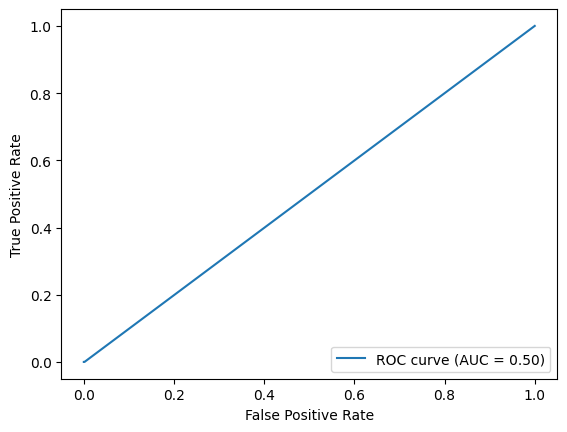

In [ ]:
# prompt: usar ROC con random para clasificar

from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# Load the data
#df = pd.read_csv('data.csv')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('Bankrupt?', axis=1), df['Bankrupt?'], test_size=0.20, random_state=42)

# Create a LogisticRegression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Compute the ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


El AUC=0,50 ESO INDICA QUE NO ES MUY BUENO EL MODELO ROC PARA CLASIFICAR

# **ML-MODELOS DE REGRESIÓN (RSME-MAE-R2)**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [ ]:
X_nuevo = df.drop('Bankrupt?', axis=1)
y_nuevo = df['Bankrupt?']

#X_nuevo = ...  # Selecciona las características apropiadas
#y_nuevo = ...  # Selecciona la variable objetivo apropiada

# Paso 4: Dividir el conjunto de datos en entrenamiento y prueba
X_train_nuevo, X_test_nuevo, y_train_nuevo, y_test_nuevo = train_test_split(X_nuevo, y_nuevo, test_size=0.2, random_state=2)

# Paso 5: Crear y ajustar el modelo (usando regresión lineal como ejemplo)
lr_nuevo = LinearRegression()
lr_nuevo.fit(X_train_nuevo, y_train_nuevo)

# Paso 6: Realizar predicciones en el conjunto de prueba
y_pred_nuevo = lr_nuevo.predict(X_test_nuevo)

# Paso 7: Evaluar el rendimiento del modelo
mae_nuevo = mean_absolute_error(y_test_nuevo, y_pred_nuevo)
print("MAE para el nuevo conjunto de datos:", mae_nuevo)

NameError: ignored

In [ ]:
from sklearn.metrics import mean_squared_error
print("MSE",mean_squared_error(y_test_nuevo, y_pred_nuevo))

MSE 5151416690279757.0


In [ ]:
print("RMSE",np.sqrt(mean_squared_error(y_test_nuevo,y_pred_nuevo)))

RMSE 71773370.3422081


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test_nuevo,y_pred_nuevo)
print(r2)

-1.95201330915064e+17


##Dado el r2, puedo decir que el modelo que estoy evaluado no es bueno para predecir valores, pues es 0. Es decir que con regresión lineal no deberia trabajar. Debería trabajar con otros modelos de prección de datos más acordes. Quizá un indicio me lo dió el F1 SCORE, al predecir la clasifición ya que no era bueno para ambos.

# Veo que es underfiteado, porque el r2=0



4-RECOMENDACIONES











In [4]:
pip install nbconvert



SyntaxError: ignored